Importing libraries and setting up aliases

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Reading a CSV file

In [2]:
df = pd.read_csv('/content/Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Returning the number of rows and columns in a datset

column description:

Customers who left within the last month – the column is called Churn

Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

Demographic info about customers – gender, age range, and if they have partners and dependents

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Converting the 'TotalCharges' column to numeric and drop rows with missing values

In [4]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

Displaying the count of missing values for each column in the dataset

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


<Axes: >

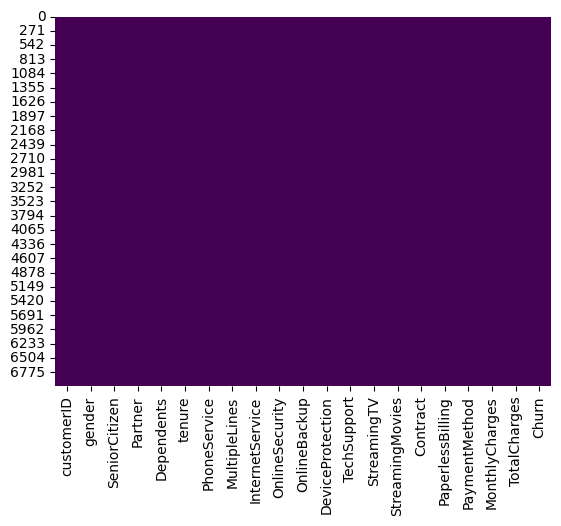

In [5]:
print(df.isnull().sum())
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)

Inference:

TotalCharges has 11 missing values


Printing unique values for each column in the dataset

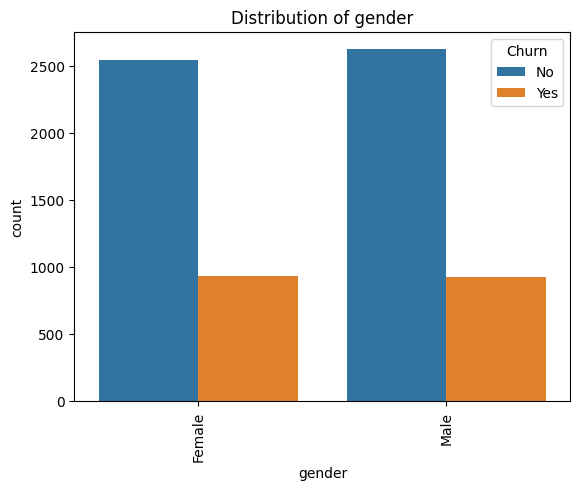

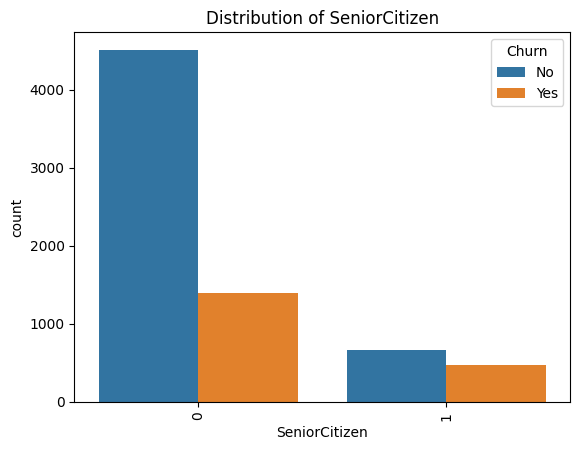

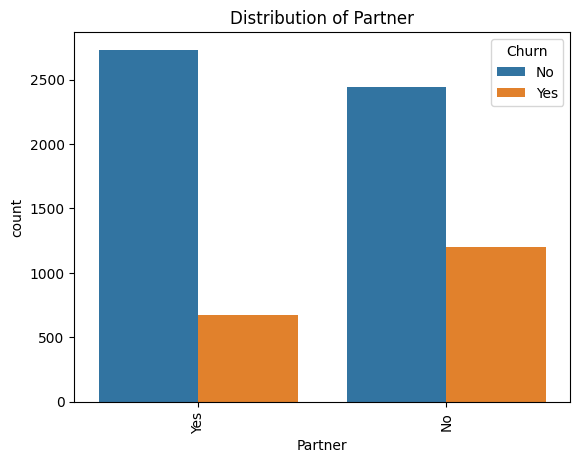

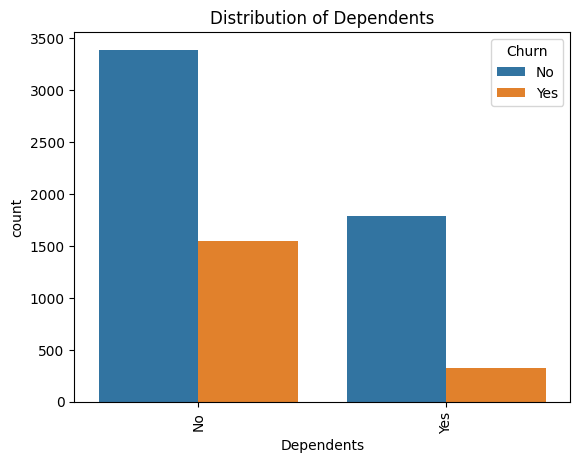

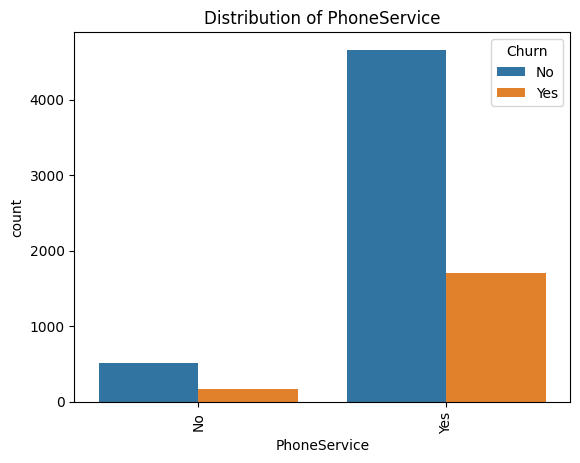

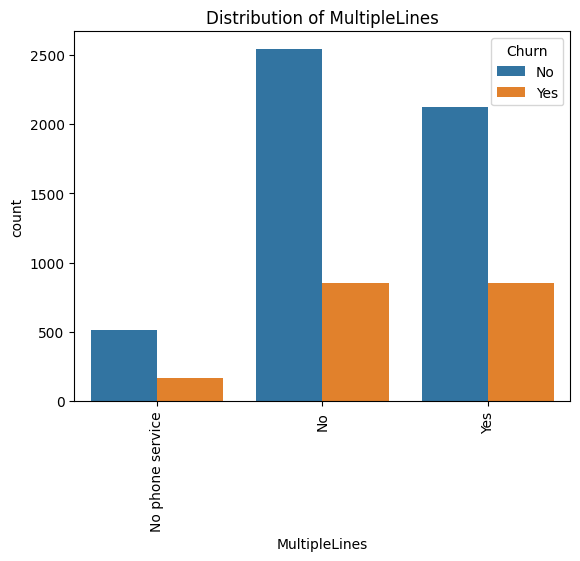

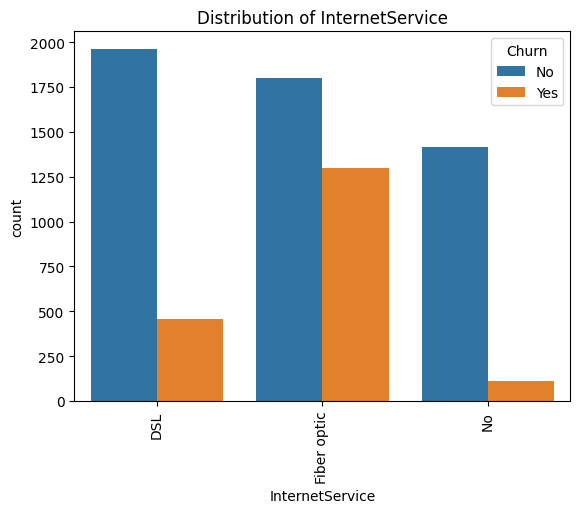

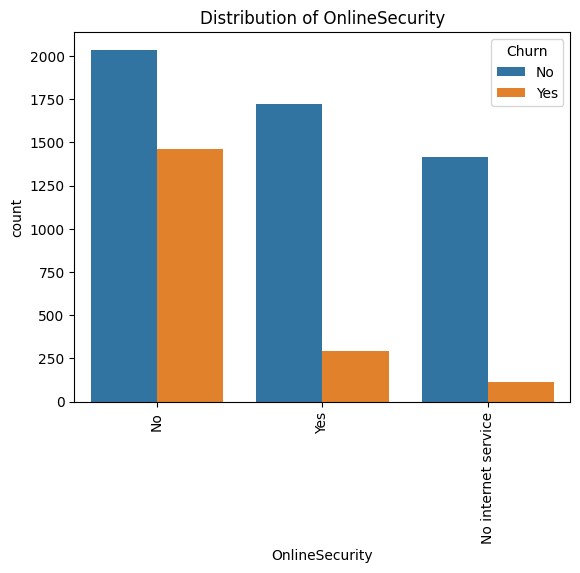

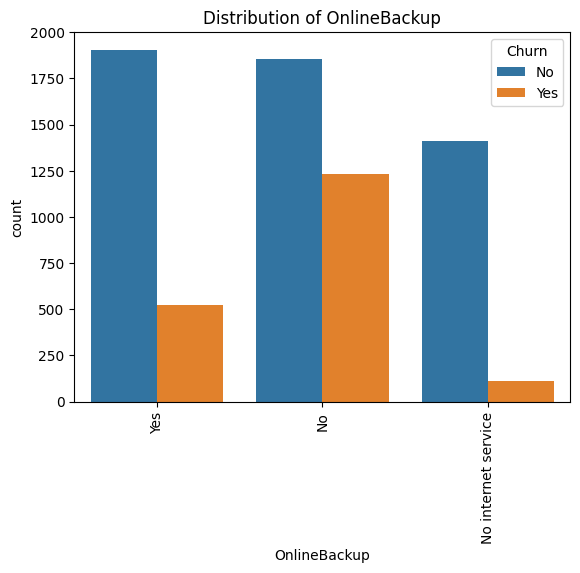

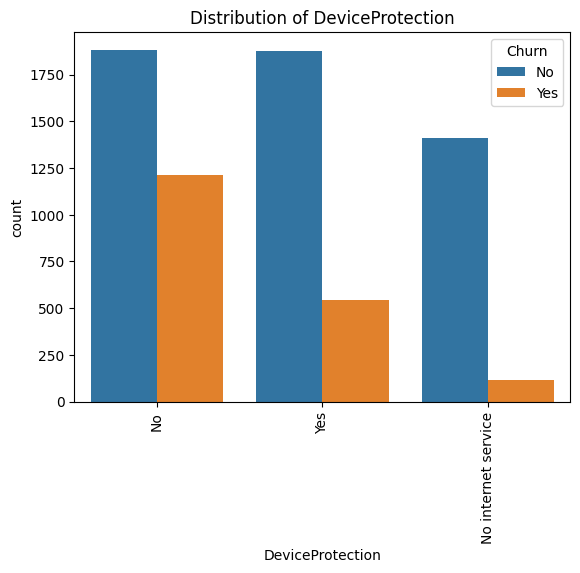

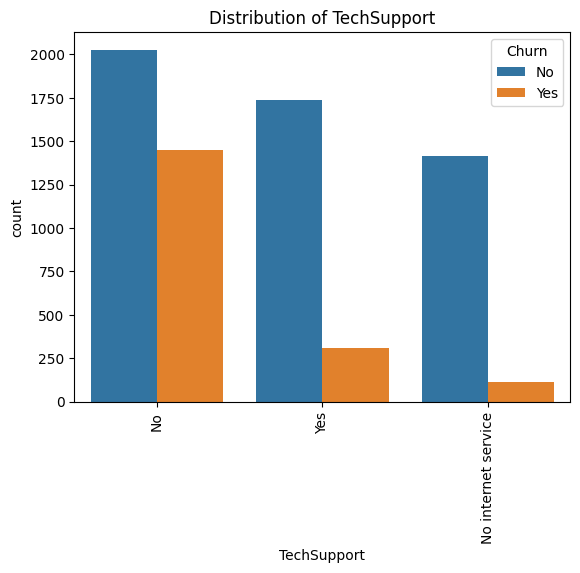

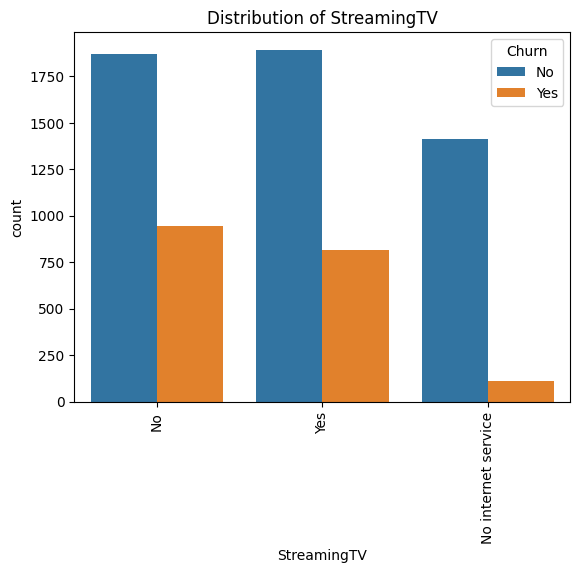

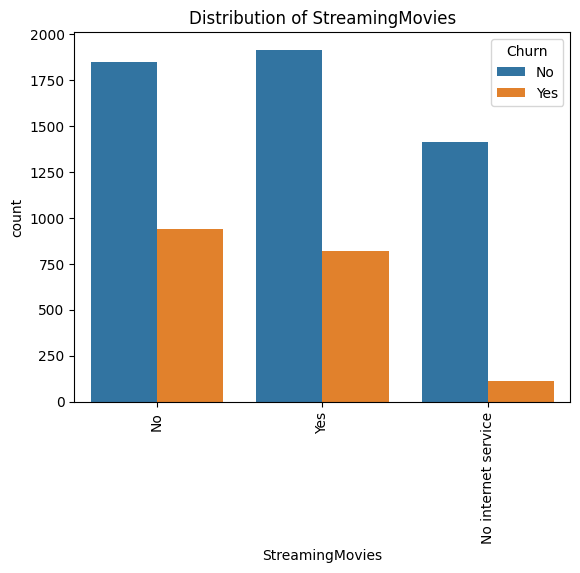

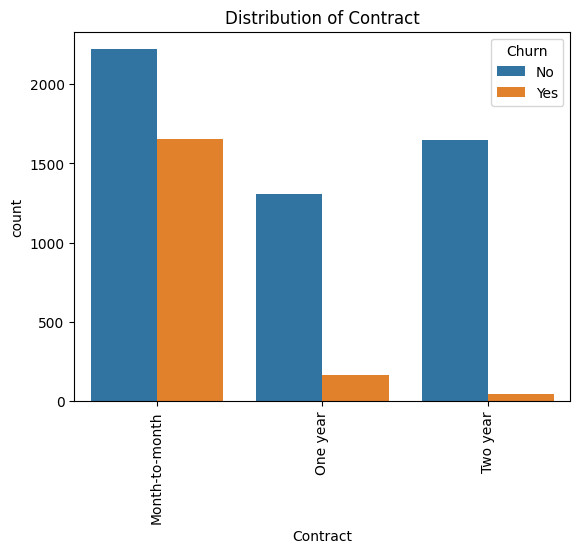

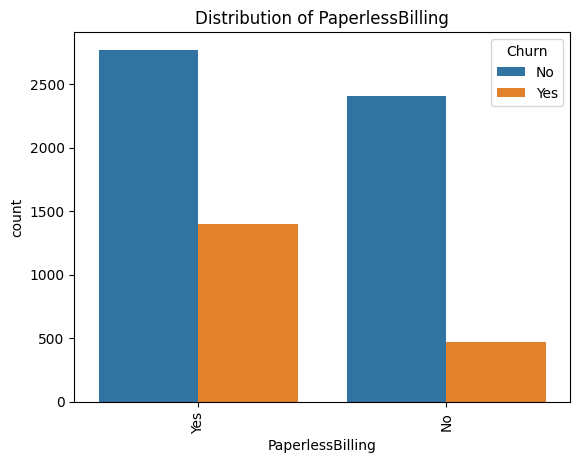

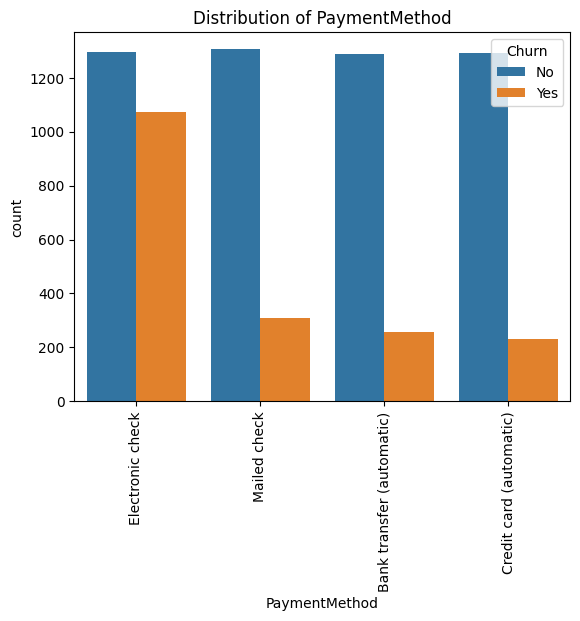

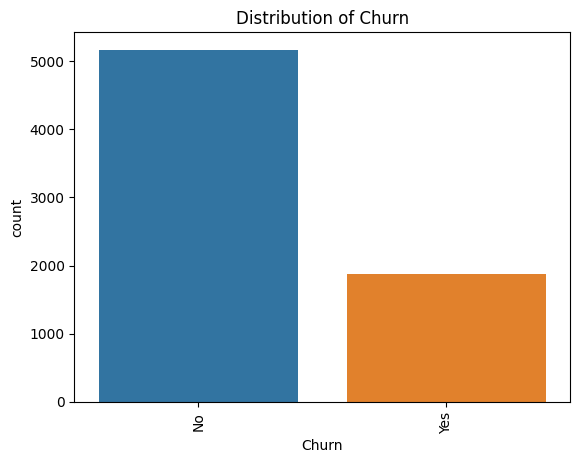

In [6]:
selected_df=df.drop(["customerID","tenure", "MonthlyCharges", "TotalCharges"],axis=1)
for col in selected_df.columns:
    sns.countplot(x=col,hue='Churn', data=df)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=90)
    plt.show()

Inference:

1.churn is imbalanced has 5000 as no and 2000 as yes

2.Majority of the senior citizens has less number of churns

3.The customers with partners are majority in the churn distribution

In [7]:
for i in df:
  print(i,df[i].unique())

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (a

Converting no phone service and no internet service as no

In [8]:
df['MultipleLines']=df['MultipleLines'].map({'No':0,'Yes':1,'No phone service':0})
df['OnlineSecurity']=df['OnlineSecurity'].map({'No':0,'Yes':1,'No internet service':0})
df['OnlineBackup']=df['OnlineBackup'].map({'No':0,'Yes':1,'No internet service':0})
df['DeviceProtection']=df['DeviceProtection'].map({'No':0,'Yes':1,'No internet service':0})
df['TechSupport']=df['TechSupport'].map({'No':0,'Yes':1,'No internet service':0})
df['StreamingTV']=df['StreamingTV'].map({'No':0,'Yes':1,'No internet service':0})
df['StreamingMovies']=df['StreamingMovies'].map({'No':0,'Yes':1,'No internet service':0})
df['gender'].replace({"Female":0, "Male":1}, inplace=True)

for i in df:
  print(i,df[i].unique())

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender [0 1]
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService ['No' 'Yes']
MultipleLines [0 1]
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity [0 1]
OnlineBackup [1 0]
DeviceProtection [0 1]
TechSupport [0 1]
StreamingTV [0 1]
StreamingMovies [0 1]
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn ['No' 'Yes']


One-hot encoding specified columns in the dataset

In [9]:
more_than_2 = ['Contract' ,'PaymentMethod','InternetService']
df = pd.get_dummies(data=df, columns= more_than_2)
for i in df:
  print(i,df[i].unique())

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender [0 1]
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService ['No' 'Yes']
MultipleLines [0 1]
OnlineSecurity [0 1]
OnlineBackup [1 0]
DeviceProtection [0 1]
TechSupport [0 1]
StreamingTV [0 1]
StreamingMovies [0 1]
PaperlessBilling ['Yes' 'No']
MonthlyCharges [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn ['No' 'Yes']
Contract_Month-to-month [1 0]
Contract_One year [0 1]
Contract_Two year [0 1]
PaymentMethod_Bank transfer (automatic) [0 1]
PaymentMethod_Credit card (automatic) [0 1]
PaymentMethod_Electronic check [1 0]
PaymentMethod_Mailed check [0 1]
InternetService_D

Dropping some columns and replacing values in specific columns with 0 for 'No' and 1 for 'Yes'

In [10]:
two_cate = ['Partner', 'Dependents', 'PaperlessBilling','PhoneService', 'Churn']
for i in two_cate:
    df[i].replace({"No":0, "Yes":1}, inplace=True)
df=df.drop(['customerID'],axis=1)
for i in df:
  print(i,df[i].unique())

gender [0 1]
SeniorCitizen [0 1]
Partner [1 0]
Dependents [0 1]
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService [0 1]
MultipleLines [0 1]
OnlineSecurity [0 1]
OnlineBackup [1 0]
DeviceProtection [0 1]
TechSupport [0 1]
StreamingTV [0 1]
StreamingMovies [0 1]
PaperlessBilling [1 0]
MonthlyCharges [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn [0 1]
Contract_Month-to-month [1 0]
Contract_One year [0 1]
Contract_Two year [0 1]
PaymentMethod_Bank transfer (automatic) [0 1]
PaymentMethod_Credit card (automatic) [0 1]
PaymentMethod_Electronic check [1 0]
PaymentMethod_Mailed check [0 1]
InternetService_DSL [1 0]
InternetService_Fiber optic [0 1]
InternetService_No [0 1]


Printing the total number of duplicate rows and removing those rows

In [11]:
print(f'\n\nTotal duplicate rows: {df.duplicated().sum()}')
df= df.drop_duplicates()



Total duplicate rows: 22


Scaling the dataset using minmaxscaler

In [12]:
cols=[]
mm = MinMaxScaler()
mappin = dict()
for variable in cols:
    mappings = {k: i for i, k in enumerate(df[variable].dropna().unique(), 0)}
    mappin[variable] = mappings

for variable in cols:
    df[variable] = df[variable].map(mappin[variable])
# print(df.isnull().sum())
df_dropna=df.dropna()

df_mean=df.fillna(df.mean().iloc[0])

df_median=df.fillna(df.median().iloc[0])

columns_with_missing_values = ['TotalCharges']

X_train = df.drop(columns=columns_with_missing_values)
y_train = df[columns_with_missing_values]

# Identify rows with missing values
missing_rows = df[y_train.isnull().any(axis=1)].index

# Create a mask to identify rows without missing values
non_missing_rows = df[~df.index.isin(missing_rows)]

# Split the data into training and test sets
X = non_missing_rows.drop(columns=columns_with_missing_values)
y = non_missing_rows[columns_with_missing_values]


# Train a RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Predict missing values in the test set
X_test=df[df.index.isin(missing_rows)].drop(columns=columns_with_missing_values)
predicted_values = model.predict(X_test)

# Impute missing values in the original dataset
df.loc[X_test.index, columns_with_missing_values] = predicted_values

df  = df.apply(lambda col: mm.fit_transform(col.values.reshape(-1, 1)).flatten())
df_dropna  = df_dropna.apply(lambda col: mm.fit_transform(col.values.reshape(-1, 1)).flatten())
df_mean  = df_mean.apply(lambda col: mm.fit_transform(col.values.reshape(-1, 1)).flatten())
df_median  = df_median.apply(lambda col: mm.fit_transform(col.values.reshape(-1, 1)).flatten())

print(df.isnull().sum())
df,df_mean,df_median,df_dropna

<ipython-input-12-d8fa52cc971b>:35: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X, y)


gender                                     0
SeniorCitizen                              0
Partner                                    0
Dependents                                 0
tenure                                     0
PhoneService                               0
MultipleLines                              0
OnlineSecurity                             0
OnlineBackup                               0
DeviceProtection                           0
TechSupport                                0
StreamingTV                                0
StreamingMovies                            0
PaperlessBilling                           0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
Contract_Month-to-month                    0
Contract_One year                          0
Contract_Two year                          0
PaymentMethod_Bank transfer (automatic)    0
PaymentMethod_Credit card (automatic)      0
PaymentMet

(      gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
 0        0.0            0.0      1.0         0.0  0.013889           0.0   
 1        1.0            0.0      0.0         0.0  0.472222           1.0   
 2        1.0            0.0      0.0         0.0  0.027778           1.0   
 3        1.0            0.0      0.0         0.0  0.625000           0.0   
 4        0.0            0.0      0.0         0.0  0.027778           1.0   
 ...      ...            ...      ...         ...       ...           ...   
 7038     1.0            0.0      1.0         1.0  0.333333           1.0   
 7039     0.0            0.0      1.0         1.0  1.000000           1.0   
 7040     0.0            0.0      1.0         1.0  0.152778           0.0   
 7041     1.0            1.0      1.0         0.0  0.055556           1.0   
 7042     1.0            0.0      0.0         0.0  0.916667           1.0   
 
       MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ... 

Dropping the categorical values in specified columns and dropping the "customerID" column

Creating the correlation matrix for the dataset

<Axes: >

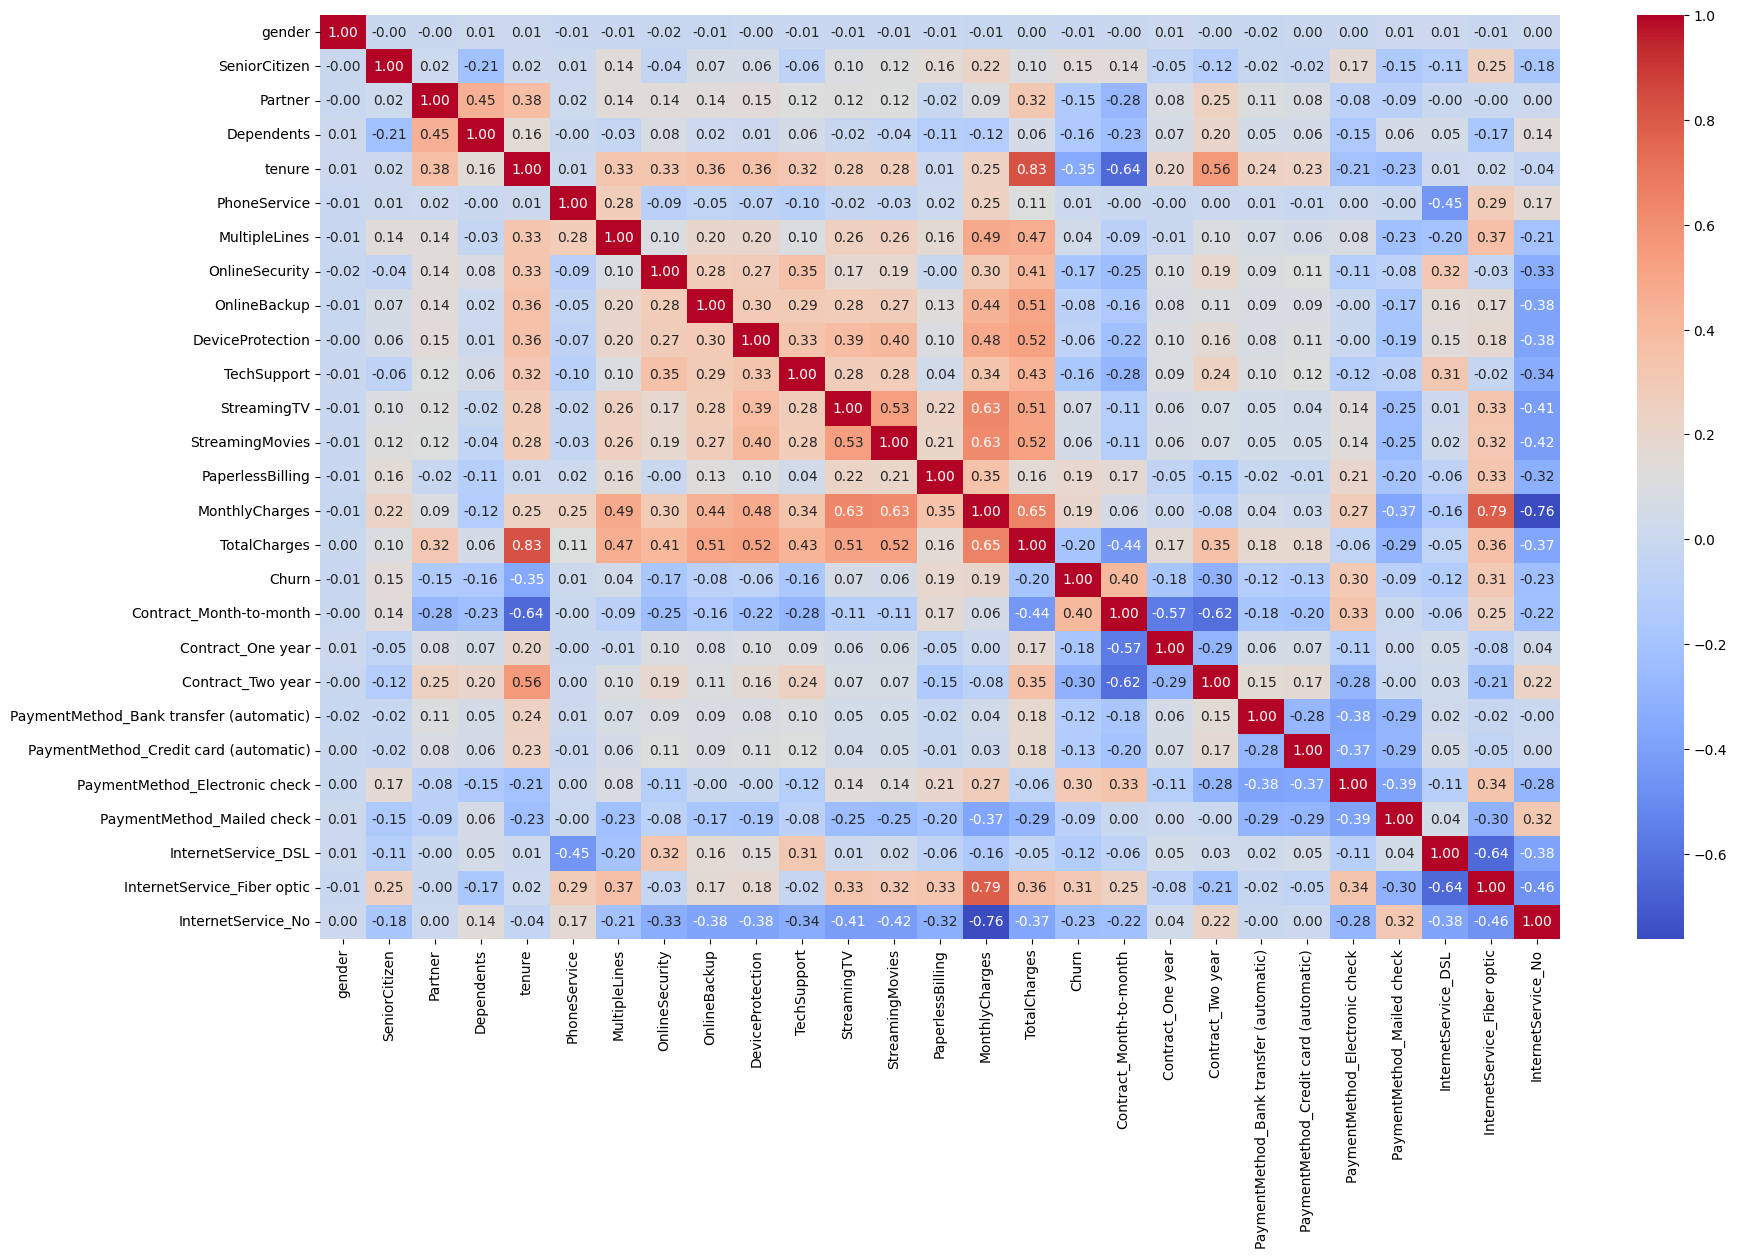

In [13]:
plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")

Inference:

The columns 'gender',
'PhoneService', 'MultipleLines', 'OnlineBackup', 'DeviceProtection', 'StreamingTV', 'StreamingMovies', and 'PaymentMethod_Mailed check'has very less correlation with churn

Creating a pairplot

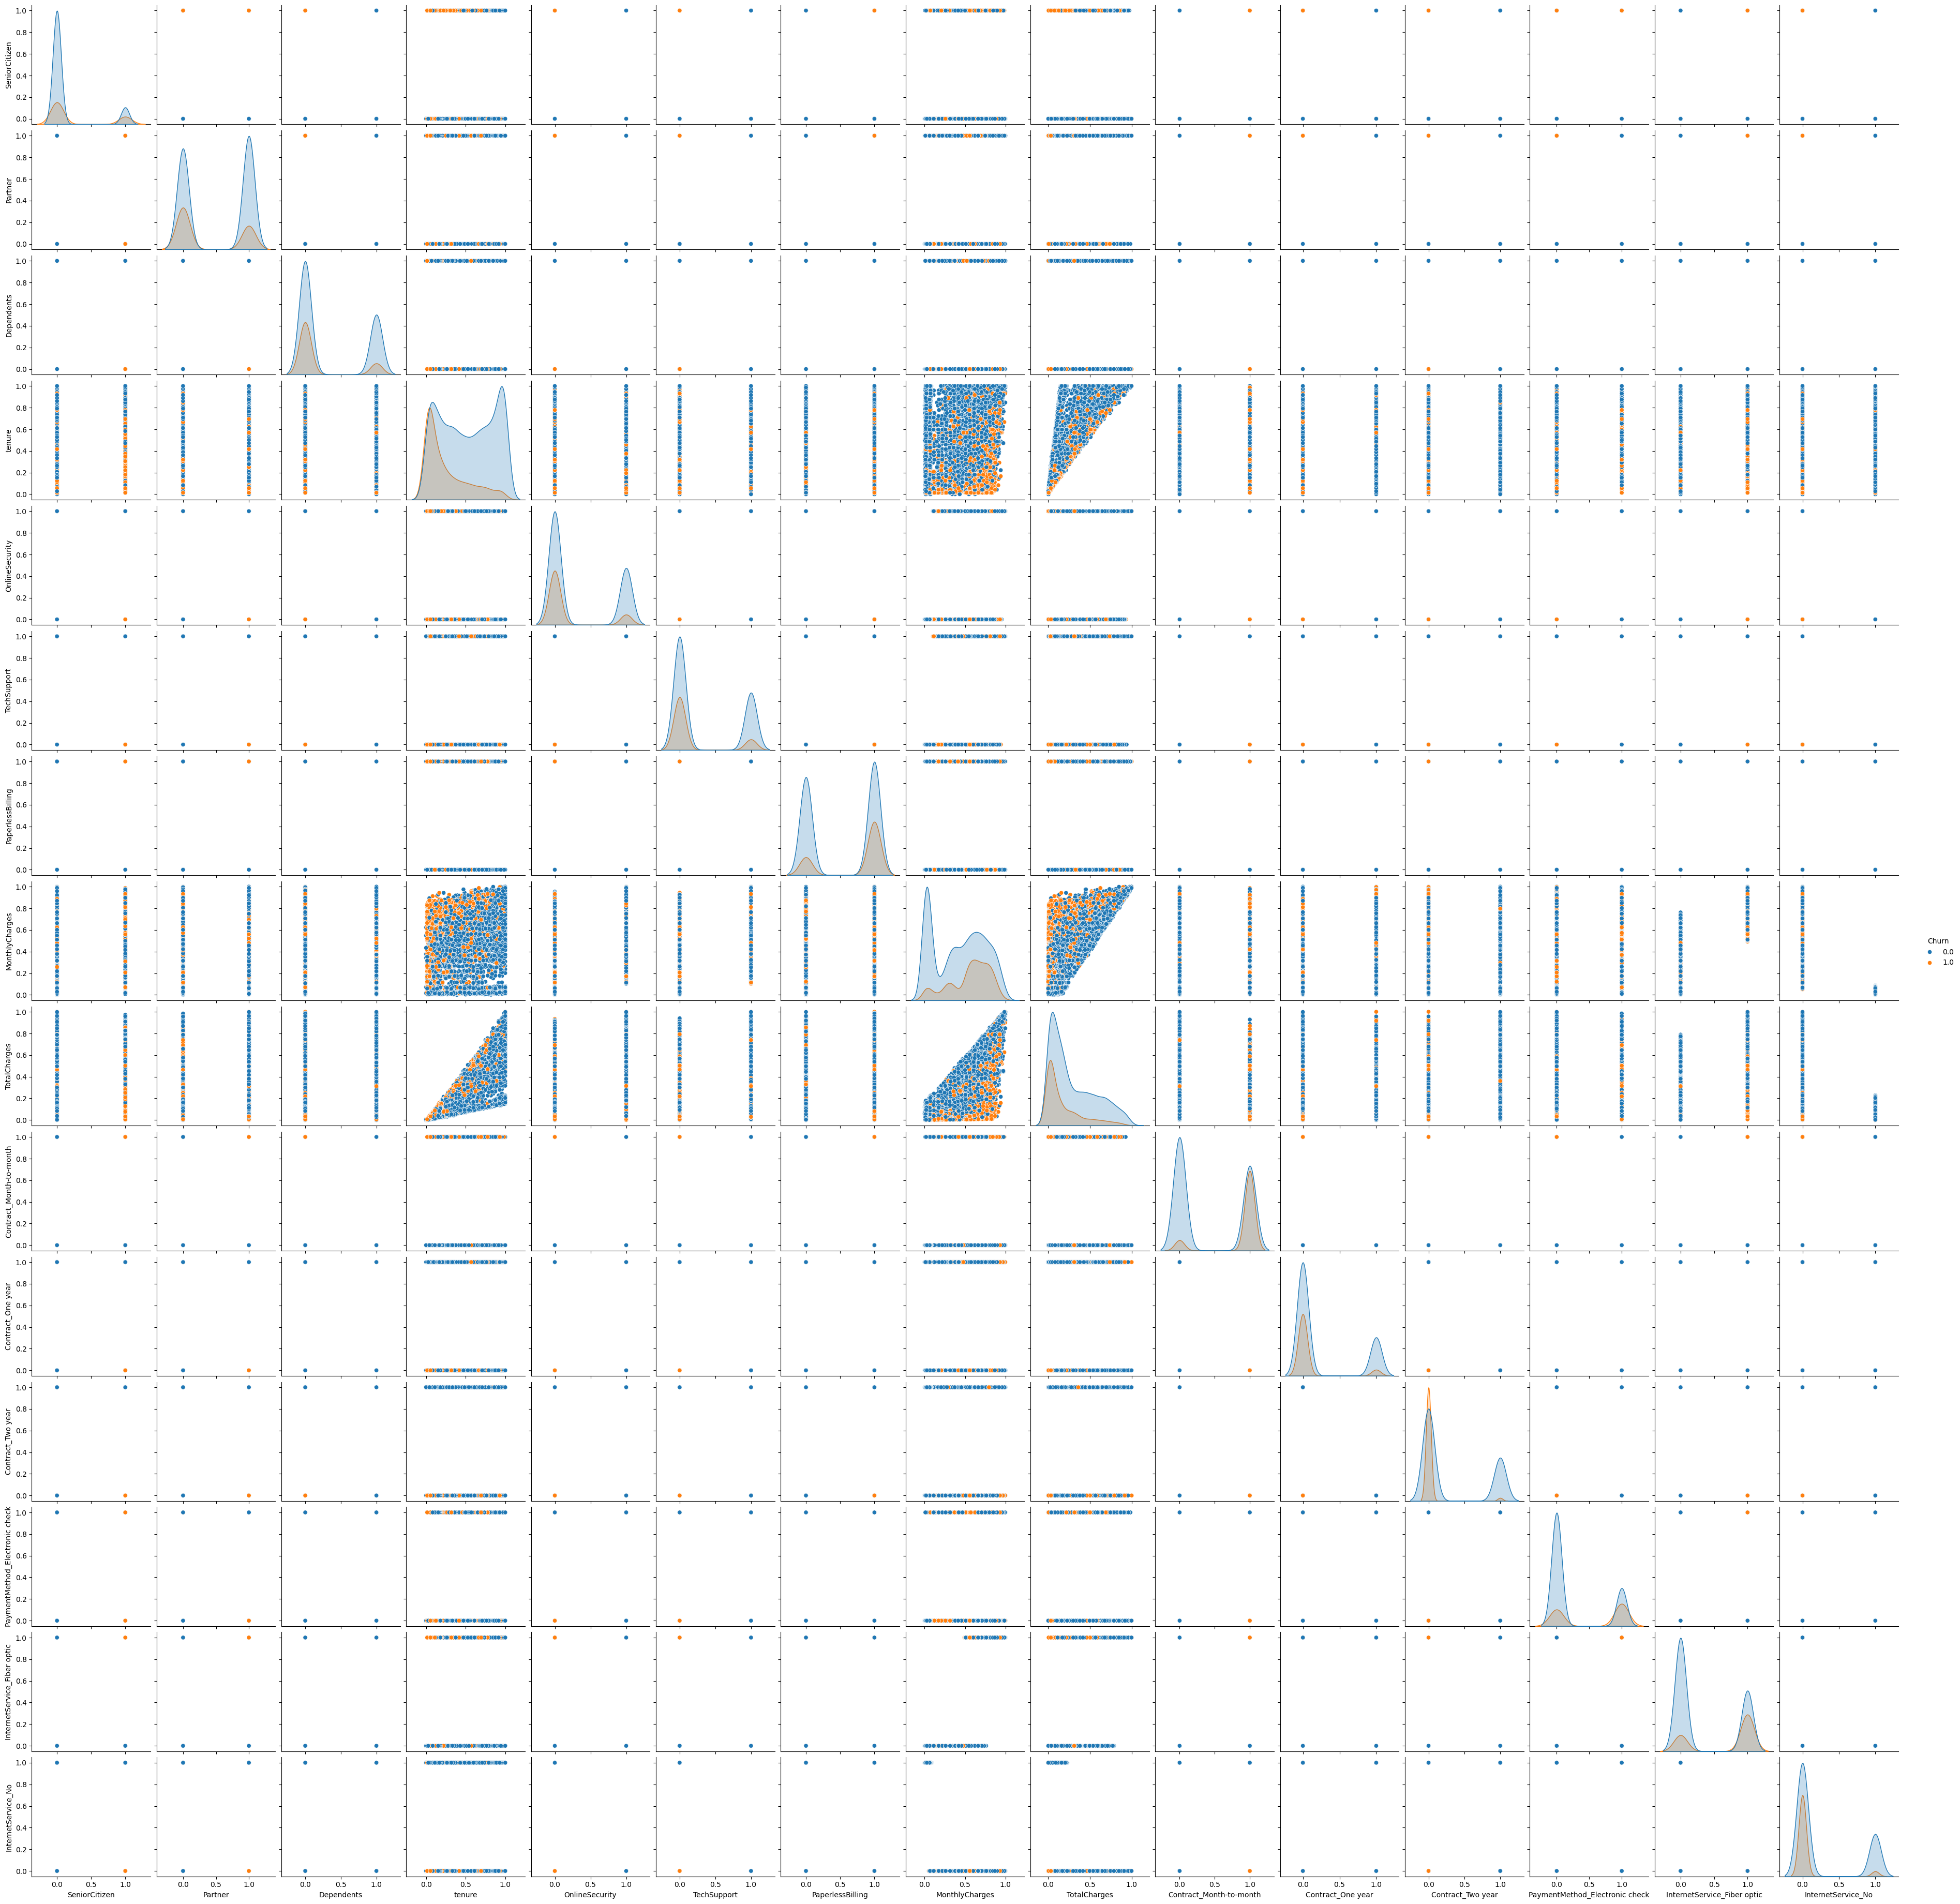

In [14]:
selected_df=df.drop(['gender','PhoneService','MultipleLines','PaymentMethod_Bank transfer (automatic)','PaymentMethod_Credit card (automatic)'
,'PaymentMethod_Mailed check','InternetService_DSL' ,'OnlineBackup','DeviceProtection','StreamingTV','StreamingMovies'], axis=1)
sns.pairplot(selected_df,hue='Churn', diag_kind='kde')

Inference:

1.When the TotalCharges increases,the tenure also increases

2.When the MonthlyCharges is high and the tenure is low,the churn is high

3.When the MonthlyCharges is high,the TotalCharges is also high

Creating input feature and target variable arrays for the prediction

In [15]:
X = df.drop(['gender','PhoneService','MultipleLines','PaymentMethod_Bank transfer (automatic)','PaymentMethod_Credit card (automatic)'
,'PaymentMethod_Mailed check','InternetService_DSL' ,'OnlineBackup','DeviceProtection','StreamingTV','StreamingMovies','Churn'], axis=1)
y = df['Churn']

Using the Synthetic Minority Over-sampling Technique to oversample the minority class

In [16]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X,y = oversample.fit_resample(X,y)

Splitting the target and feature variables as test and train sets

In [17]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

Implementing sklearn's adaboost classification model  and classifiaction report

In [18]:
clf = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1))
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


Printing the accuracy, confusion matrix, and classification report

In [19]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 77.44%
Confusion Matrix:
[[1220  478]
 [ 291 1420]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.72      0.76      1698
         1.0       0.75      0.83      0.79      1711

    accuracy                           0.77      3409
   macro avg       0.78      0.77      0.77      3409
weighted avg       0.78      0.77      0.77      3409



Creating a custom adaboost class using decision stumps for binary classification with the DecisionStump and Adaboost classes

In [20]:
import math

class DecisionStump:
    def __init__(self):
        self.polarity = 1
        self.feature_index = None
        self.threshold = None
        self.alpha = None

class Adaptive_Boost:

    def __init__(self, n_clf=5):
        self.n_clf = n_clf

    def __str__(self):
        return "Adaptive_Boost"

    def cfit(self, X, y):
        X = X.to_numpy()
        y = np.where(y.to_numpy() == 0, -1, 1)
        n_samples, n_features = X.shape

        # Initialize weights to 1/N
        w = np.full(n_samples, 1 / n_samples)

        self.clfs = []

        for _ in range(self.n_clf):
            clf = DecisionStump()
            min_error = float('inf')

            for feature_i in range(n_features):
                feature_values = np.expand_dims(X[:, feature_i], axis=1)
                unique_values = np.unique(feature_values)

                for threshold in unique_values:
                    p = 1
                    prediction = np.ones(n_samples)
                    negative_idx = (feature_values < threshold).flatten()
                    prediction[negative_idx] = -1
                    error = np.sum(w[y != prediction])

                    if error > 0.5:
                        error = 1 - error
                        p = -1

                    if error < min_error:
                        clf.polarity = p
                        clf.threshold = threshold
                        clf.feature_index = feature_i
                        min_error = error

            clf.alpha = 0.5 * math.log((1.0 - min_error) / (min_error + 1e-10))

            predictions = np.ones(n_samples)
            negative_idx = (clf.polarity * X[:, clf.feature_index] < clf.polarity * clf.threshold)
            predictions[negative_idx] = -1

            w *= np.exp(-clf.alpha * y * predictions)
            w /= np.sum(w)

            self.clfs.append(clf)

    def cpredict(self, X):
        X = X.to_numpy()
        n_samples = X.shape[0]
        y_pred = np.zeros(n_samples)

        for clf in self.clfs:
            predictions = np.ones(n_samples)
            negative_idx = (clf.polarity * X[:, clf.feature_index] < clf.polarity * clf.threshold)
            predictions[negative_idx] = -1
            y_pred += clf.alpha * predictions

        y_pred = np.sign(y_pred).flatten()
        y_pred[y_pred == -1] = 0
        return y_pred

Creating an instance of the adaboost class and assigning it to a variable 'clf' ,training the model using the training data and generating predictions using the trained model

In [21]:
clf = Adaptive_Boost()
clf.cfit(X_train, y_train)
custom_y_pred = clf.cpredict(X_test)

Printing the accuracy, confusion matrix, and classification report for the custom model


Accuracy: 75.56%
Confusion Matrix:


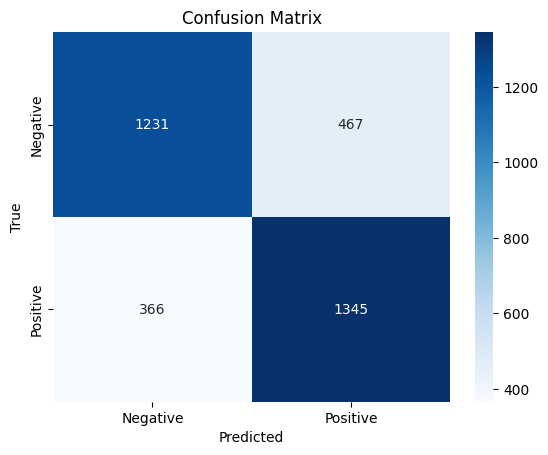

Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.72      0.75      1698
         1.0       0.74      0.79      0.76      1711

    accuracy                           0.76      3409
   macro avg       0.76      0.76      0.76      3409
weighted avg       0.76      0.76      0.76      3409



In [22]:
accuracy = accuracy_score(y_test,custom_y_pred)
print(f"\nAccuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
cm=confusion_matrix(y_test,custom_y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
print("Classification Report:")
print(classification_report(y_test,custom_y_pred))

Inference:

There are

1.1231 True Negative values

2.467 False Positive values

3.374 False Negative values

4.1337 True Positive values

in the classification

Plotting the Receiver Operating Characteristics Curve

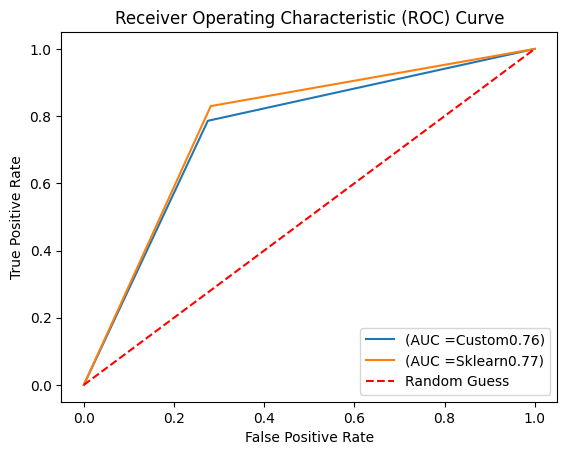

In [23]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, roc_curve, auc

models={'Custom':custom_y_pred,'Sklearn':y_pred}
for model_name, model_prob in models.items():
  fpr, tpr, thresholds = roc_curve(y_test,model_prob)
  roc_auc = auc(fpr, tpr)
  plt.plot(fpr, tpr, label=f'(AUC ={model_name}{roc_auc:.2f})')

# Plot random guess line
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Inference:

Since the curve is in the shape of a triangle,the model is a good one
